# MODUL PRAKTIKUM 4 AST: ANALISIS DATA PEMERINTAHAN

In [3]:
# Aktifkan beberapa library
import numpy as np
import pandas as pd
import matplotlib
#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Membaca dataset Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta Tahun 2010-2021 dari 5 Stasiun Pemantau Kualitas Udara (SPKU)
df = pd.read_csv("ISPU DKI Jakarta 2010-2021.csv")
df.head(200)

,tahun,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2010.0,60.0,4.0,73.0,27.0,14.0,73.0,CO,2,DKI1
1,2010.0,32.0,2.0,16.0,33.0,9.0,33.0,O3,1,DKI1
2,2010.0,27.0,2.0,19.0,20.0,9.0,27.0,PM10,1,DKI1
3,2010.0,22.0,2.0,16.0,15.0,6.0,22.0,PM10,1,DKI1
4,2010.0,25.0,2.0,17.0,15.0,8.0,25.0,PM10,1,DKI1
...,...,...,...,...,...,...,...,...,...,...
195,2010.0,63.0,17.0,31.0,31.0,15.0,63.0,PM10,2,DKI1
196,2010.0,63.0,17.0,39.0,31.0,21.0,63.0,PM10,2,DKI1
197,2010.0,81.0,20.0,41.0,43.0,23.0,81.0,PM10,2,DKI1
198,2010.0,61.0,16.0,33.0,45.0,23.0,61.0,PM10,2,DKI1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tahun        4381 non-null   float64
 1   pm10         4381 non-null   float64
 2   so2          4381 non-null   float64
 3   co           4381 non-null   float64
 4   o3           4381 non-null   float64
 5   no2          4381 non-null   float64
 6   max          4381 non-null   float64
 7   critical     4381 non-null   object 
 8   categori     4381 non-null   object 
 9   lokasi_spku  4381 non-null   object 
dtypes: float64(7), object(3)
memory usage: 342.5+ KB


# 0. PREPROCESSING (ETL)

In [6]:
# Hapus/drop fitur critical
df = df.drop(columns=['critical', 'lokasi_spku', 'max'])
df.head()


,tahun,pm10,so2,co,o3,no2,categori
0,2010.0,60.0,4.0,73.0,27.0,14.0,2
1,2010.0,32.0,2.0,16.0,33.0,9.0,1
2,2010.0,27.0,2.0,19.0,20.0,9.0,1
3,2010.0,22.0,2.0,16.0,15.0,6.0,1
4,2010.0,25.0,2.0,17.0,15.0,8.0,1


# 1. EDA

In [7]:
#Hitung nilai rata-rata 'pm10','so2','co','o3','no2' berdasarkan tahun
df_mean = df.groupby('tahun', as_index=False)['pm10','so2','co','o3','no2'].mean()
df_mean.head(12)
df_mean.to_csv('group by ISPU DKI Jakarta 2010-2021.csv',index=False)

C:\Users\bayuk\AppData\Local\Temp\ipykernel_9504\2130518169.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df.groupby('tahun', as_index=False)['pm10','so2','co','o3','no2'].mean()


In [8]:
df_mean.describe()

,tahun,pm10,so2,co,o3,no2
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2015.500000,65.334288,27.225936,31.123445,92.191980,18.040386
std,3.605551,7.315343,11.595473,7.766863,29.259488,5.402598
min,2010.000000,52.756164,13.263014,15.313187,49.840659,11.457534
25%,2012.750000,60.631847,20.004110,24.802055,80.397771,15.211885
50%,2015.500000,64.319081,25.314586,33.671233,87.858904,17.920548
75%,2018.250000,68.298630,30.817528,36.017808,113.652740,18.501604
max,2021.000000,78.243169,52.755495,43.551913,152.218579,33.766484


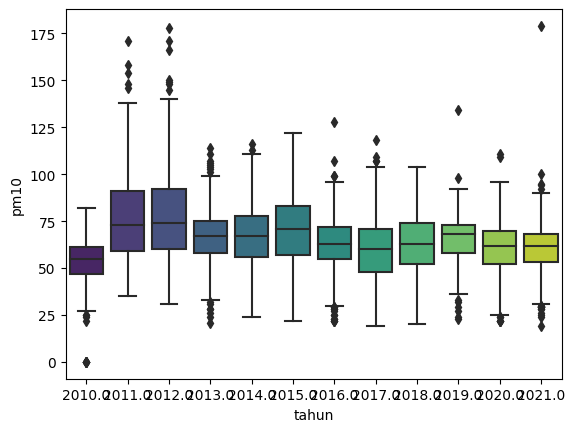

In [9]:
sns.boxplot(data=df, x='tahun',y='pm10', palette='viridis');

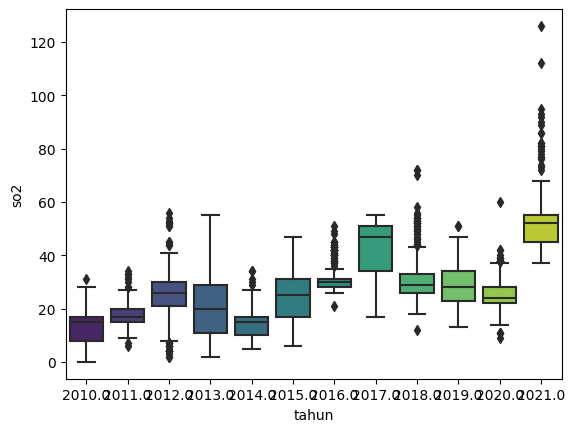

In [10]:
sns.boxplot(data=df, x='tahun',y='so2', palette='viridis');

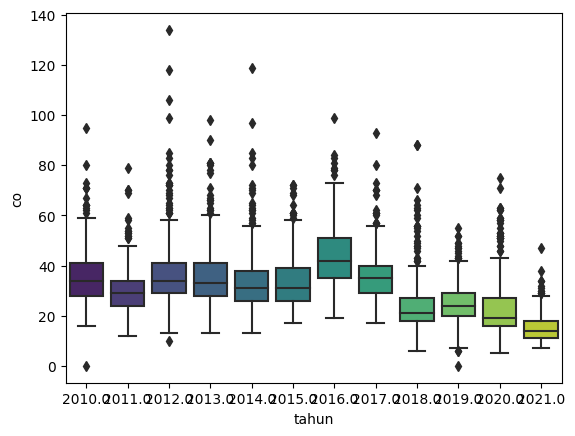

In [11]:
sns.boxplot(data=df, x='tahun',y='co', palette='viridis');

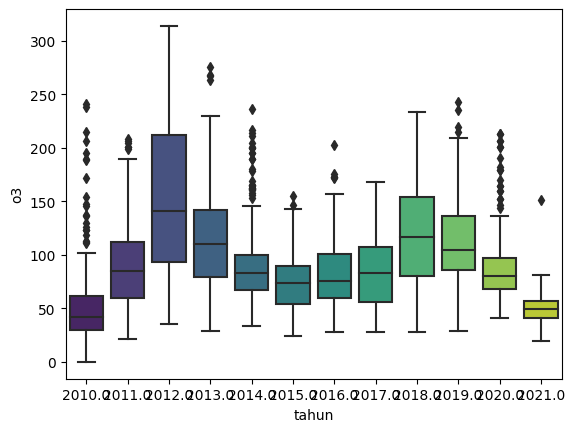

In [12]:
sns.boxplot(data=df, x='tahun',y='o3', palette='viridis');

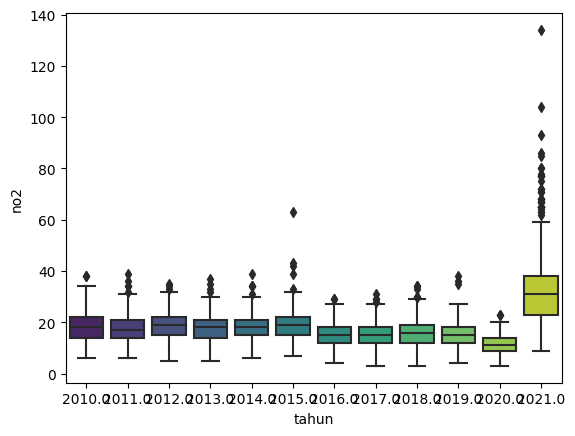

In [13]:
sns.boxplot(data=df, x='tahun',y='no2', palette='viridis');

Text(0.5, 1.0, 'Plot Korelasi ISPU DKI Jakarta 2010-2021')

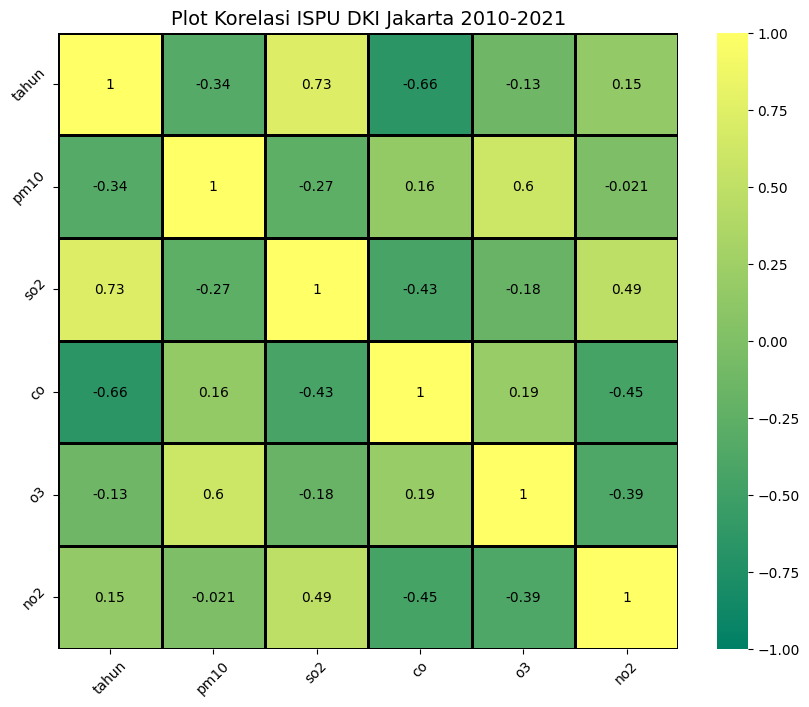

In [14]:
import seaborn as sns
corr_tahun=df_mean.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_tahun,
           cmap='summer',
           linewidths=0.75,
           linecolor='black',
           cbar=True,
           vmin=-1,
           vmax=1,
           annot=True,
           annot_kws={'size':10,'color':'black'})
plt.tick_params(labelsize=10,rotation=45)
plt.title('Plot Korelasi ISPU DKI Jakarta 2010-2021',size=14)

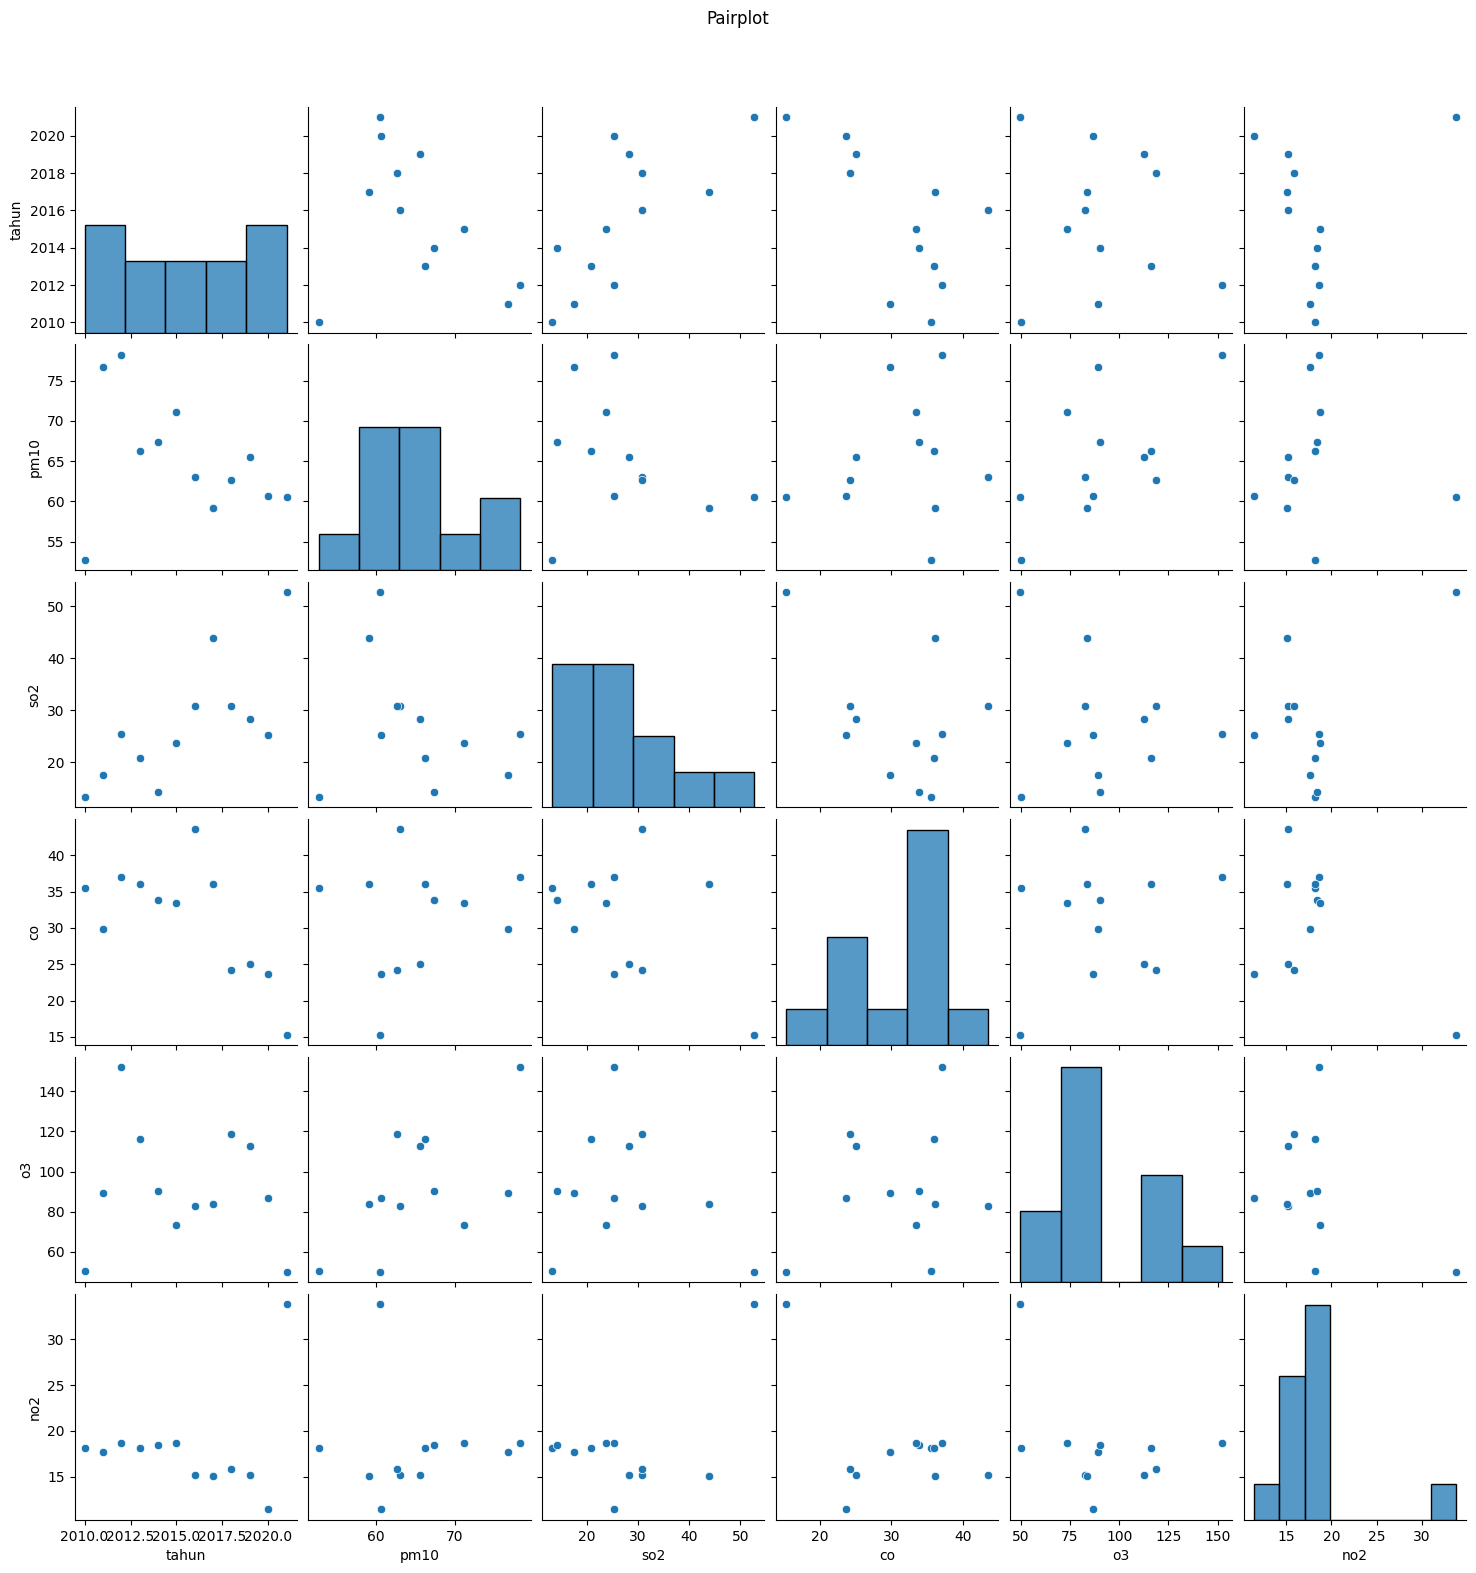

In [15]:
sns.pairplot(df_mean);
plt.suptitle('Pairplot', y=1.05);

Text(0.5, 1.0, 'Plot Korelasi ISPU DKI Jakarta 2010-2021')

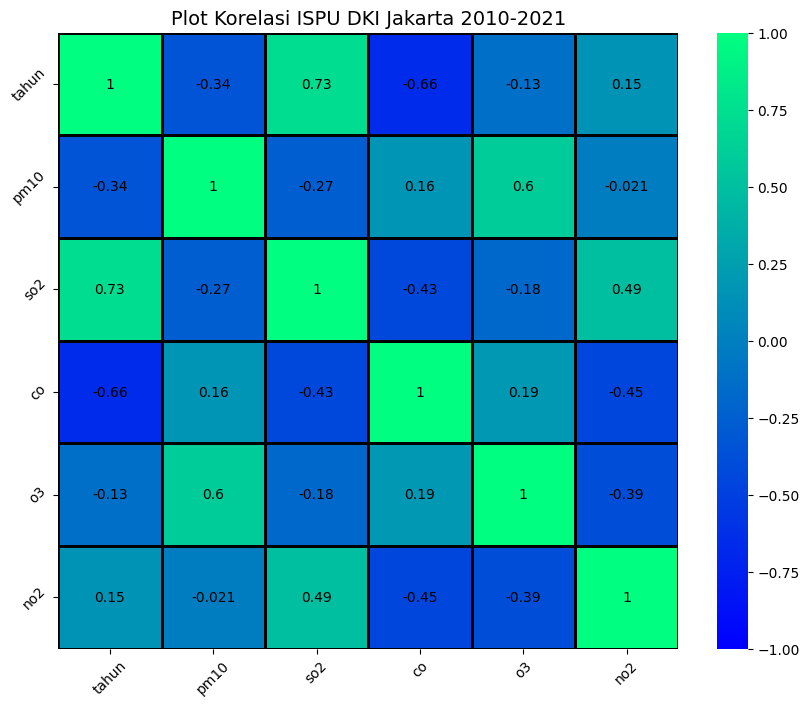

In [16]:
import seaborn as sns
corr_kab=df_mean.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_kab,
           cmap='winter',
           linewidths=0.75,
           linecolor='black',
           cbar=True,
           vmin=-1,
           vmax=1,
           annot=True,
           annot_kws={'size':10,'color':'black'})
plt.tick_params(labelsize=10,rotation=45)
plt.title('Plot Korelasi ISPU DKI Jakarta 2010-2021',size=14)

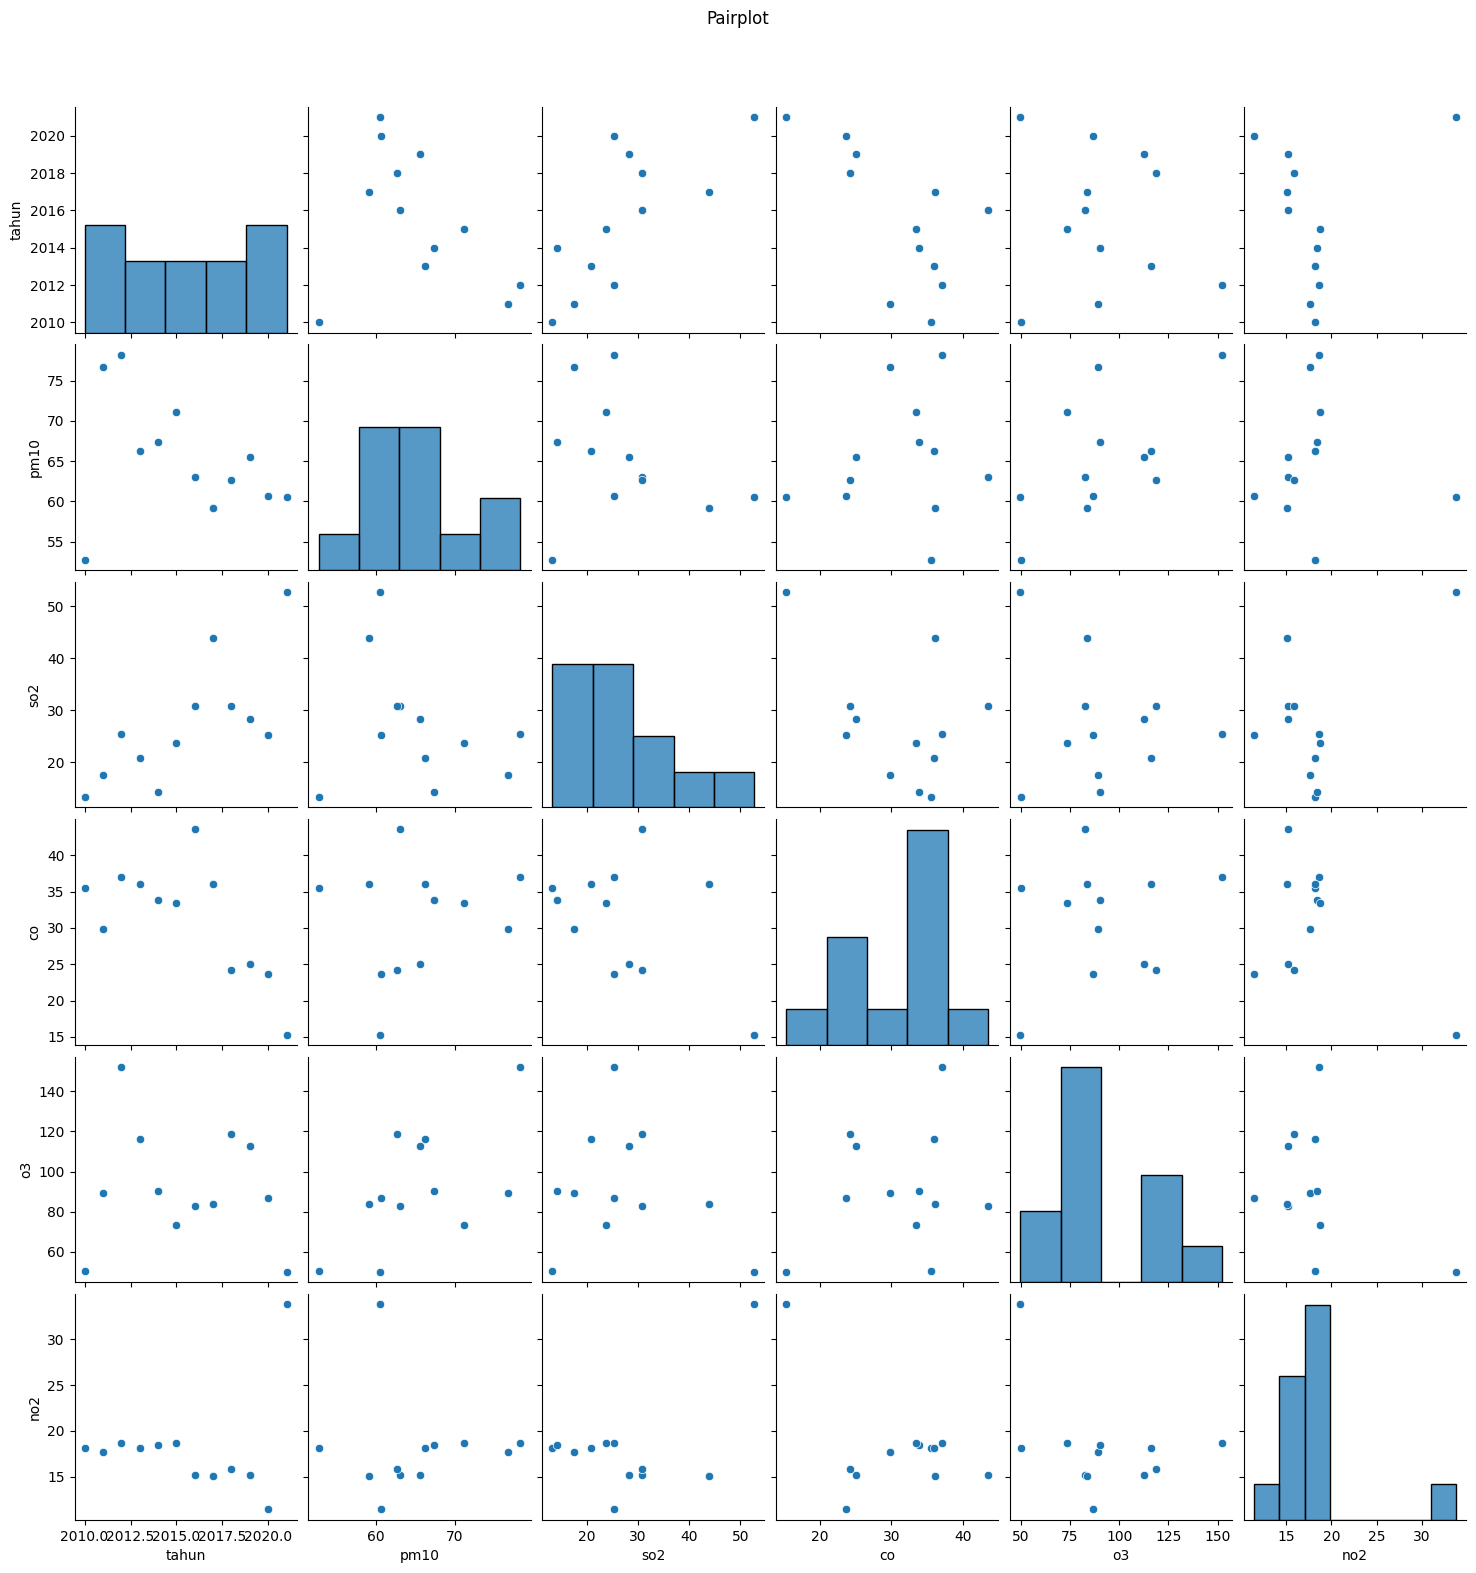

In [17]:
sns.pairplot(df_mean);
plt.suptitle('Pairplot', y=1.05);

array([[<Axes: title={'center': 'tahun'}>,
        <Axes: title={'center': 'pm10'}>],
       [<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'co'}>],
       [<Axes: title={'center': 'o3'}>, <Axes: title={'center': 'no2'}>]],
      dtype=object)

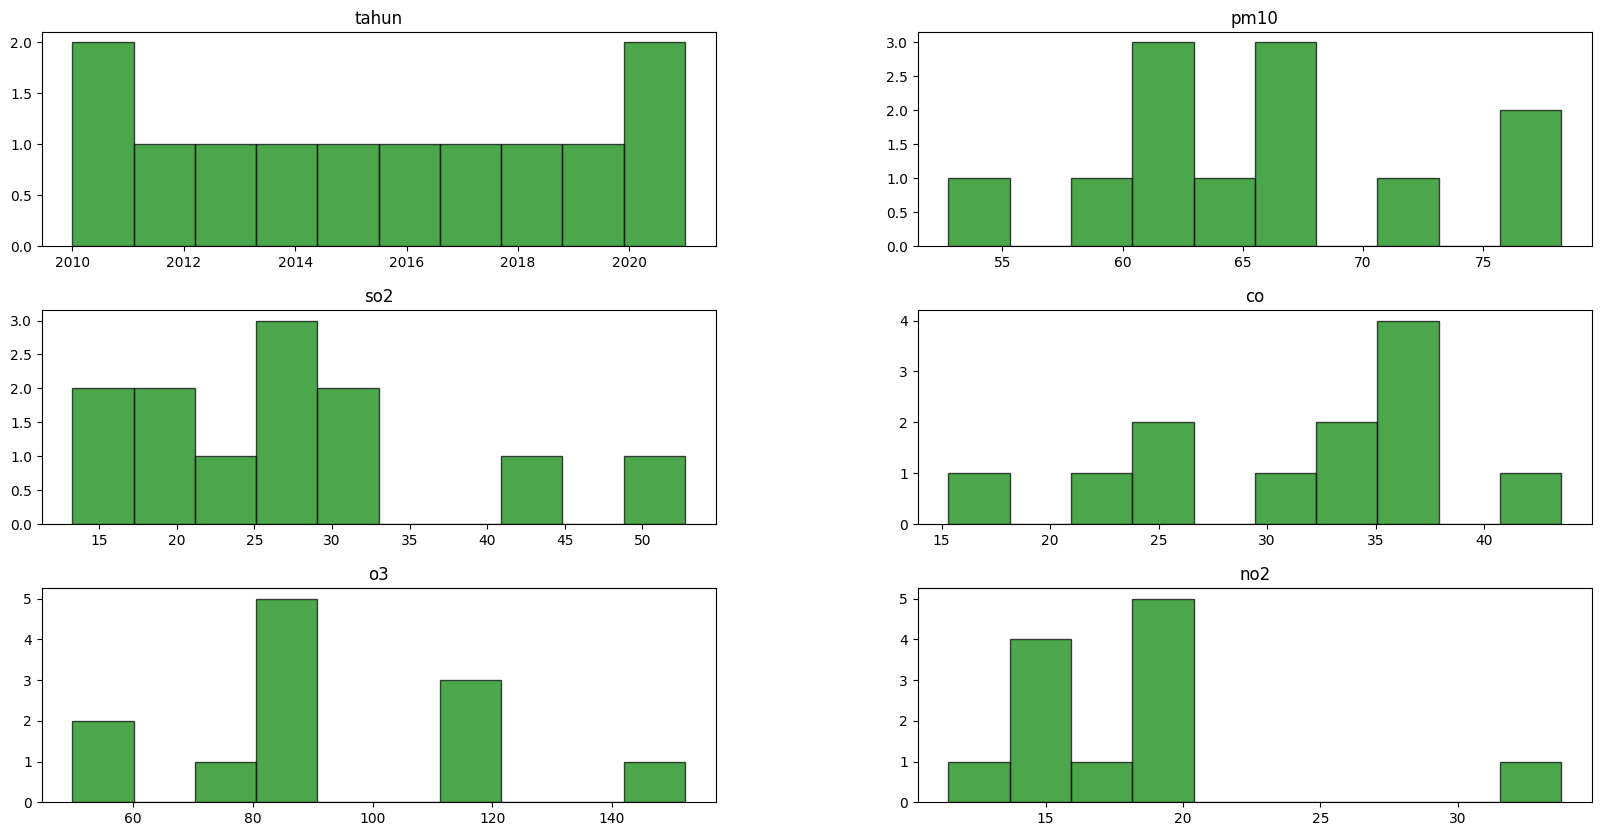

In [18]:
#Visualisasi histogram saja
df_mean.hist(figsize=(20,10),alpha = 0.7, color = 'green',edgecolor ='black',grid=False)

Text(0.5, 1.0, 'Rata-Rata pm10 ISPU DKI Jakarta 2010-2021')

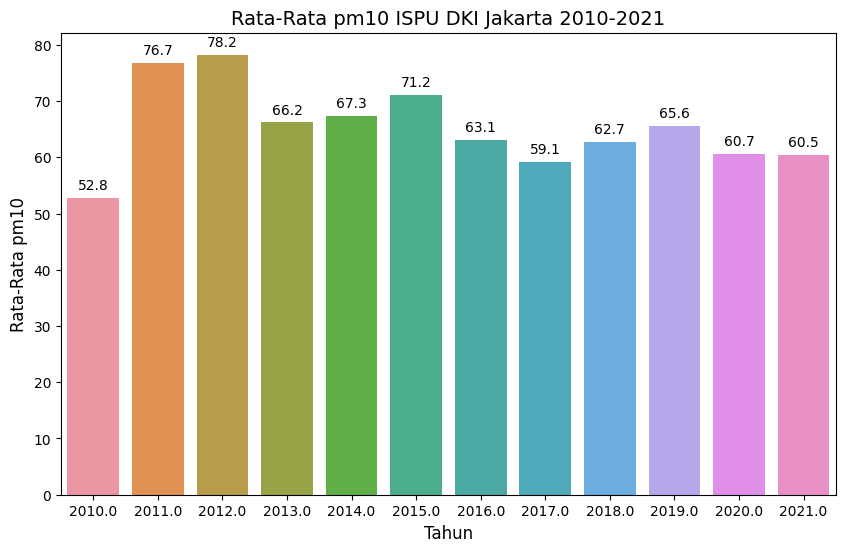

In [19]:
#Bar plot rata-rata pm10 per tahun
plt.figure(figsize=(10, 6))
splot=sns.barplot(x="tahun",y="pm10",data=df_mean)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Tahun", size=12)
plt.ylabel("Rata-Rata pm10", size=12)
plt.title("Rata-Rata pm10 ISPU DKI Jakarta 2010-2021",size=14)

Text(0.5, 1.0, 'Rata-Rata so2 ISPU DKI Jakarta 2010-2021')

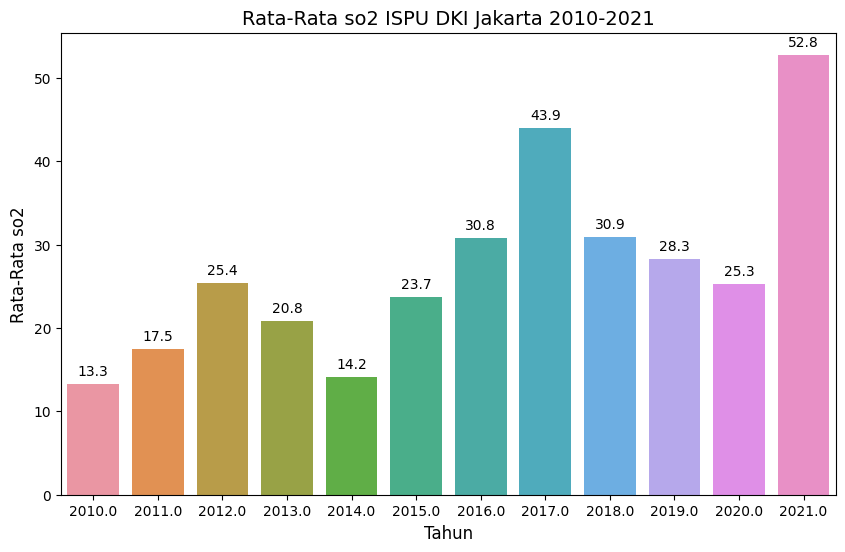

In [20]:
#Bar plot rata-rata so2 per tahun
plt.figure(figsize=(10, 6))
splot=sns.barplot(x="tahun",y="so2",data=df_mean)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Tahun", size=12)
plt.ylabel("Rata-Rata so2", size=12)
plt.title("Rata-Rata so2 ISPU DKI Jakarta 2010-2021",size=14)

Text(0.5, 1.0, 'Rata-Rata co ISPU DKI Jakarta 2010 - 2021')

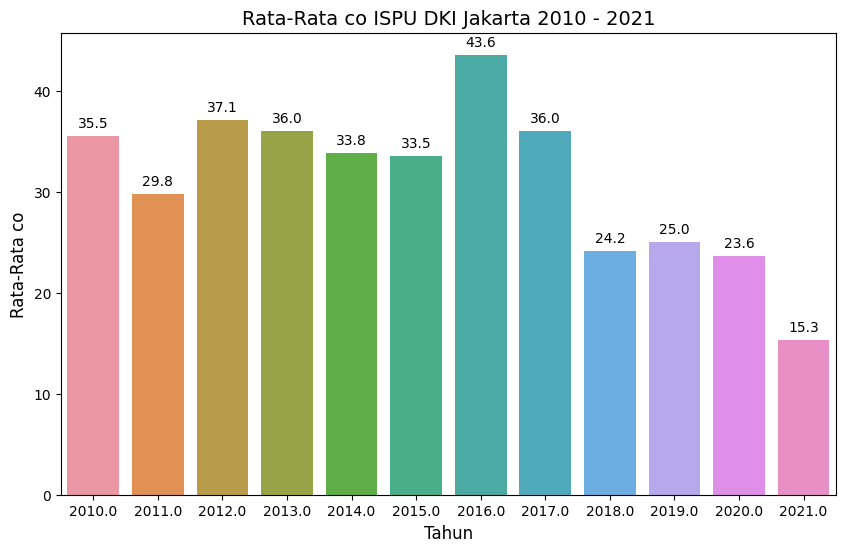

In [21]:
#Bar plot rata-rata co per tahun
plt.figure(figsize=(10, 6))
splot=sns.barplot(x="tahun",y="co",data=df_mean)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Tahun", size=12)
plt.ylabel("Rata-Rata co", size=12)
plt.title("Rata-Rata co ISPU DKI Jakarta 2010 - 2021",size=14)

Text(0.5, 1.0, 'Rata-Rata o3 ISPU DKI Jakarta 2010 - 2021')

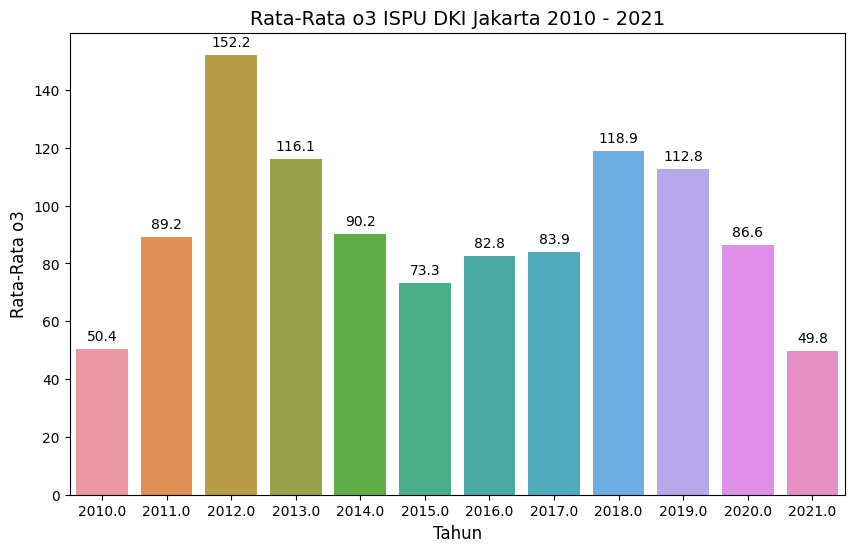

In [22]:
#Bar plot rata-rata o3 per tahun
plt.figure(figsize=(10, 6))
splot=sns.barplot(x="tahun",y="o3",data=df_mean)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Tahun", size=12)
plt.ylabel("Rata-Rata o3", size=12)
plt.title("Rata-Rata o3 ISPU DKI Jakarta 2010 - 2021",size=14)

Text(0.5, 1.0, 'Rata-Rata no2 ISPU DKI Jakarta 2010 - 2021')

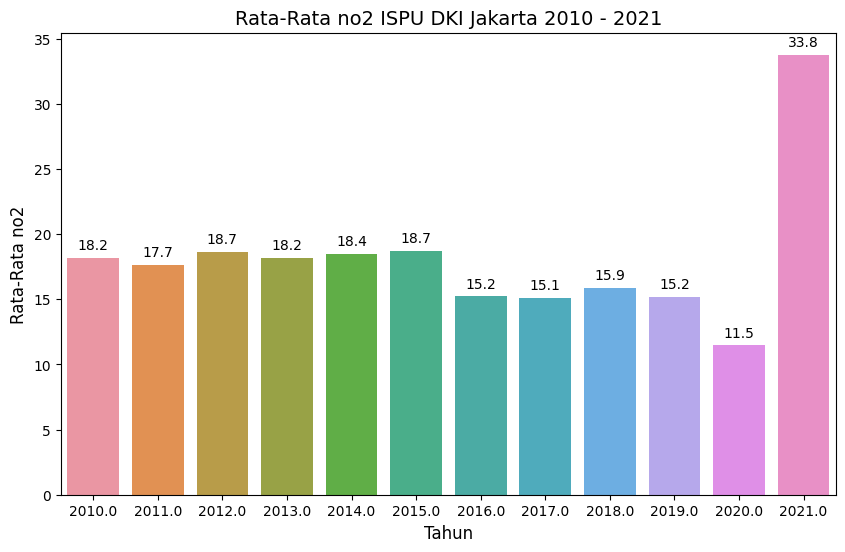

In [23]:
#Bar plot rata-rata o3 per tahun
plt.figure(figsize=(10, 6))
splot=sns.barplot(x="tahun",y="no2",data=df_mean)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Tahun", size=12)
plt.ylabel("Rata-Rata no2", size=12)
plt.title("Rata-Rata no2 ISPU DKI Jakarta 2010 - 2021",size=14)

# 2. CLUSTERING

## 2a. K-MEANS Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
df = pd.read_csv("ISPU DKI Jakarta 2010-2021-time series.csv")
df['tanggal'] = pd.to_datetime(df['tanggal'])
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,2010-01-01,60,4,73,27,14,73,CO,2,DKI1
1,2010-01-02,32,2,16,33,9,33,O3,1,DKI1
2,2010-01-03,27,2,19,20,9,27,PM10,1,DKI1
3,2010-01-04,22,2,16,15,6,22,PM10,1,DKI1
4,2010-01-05,25,2,17,15,8,25,PM10,1,DKI1
...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,59,53,16,34,33,89,PM25,2,DKI4
4379,2021-12-28,61,54,15,37,29,98,PM25,2,DKI4
4380,2021-12-29,60,53,17,38,44,102,PM25,3,DKI4
4381,2021-12-30,61,54,15,37,29,98,PM25,2,DKI4


In [25]:
df_cluster = df.drop(columns = ['tanggal','max','critical','categori','lokasi_spku'])

In [26]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(df_cluster)

C:\Users\bayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [27]:
k_means_labels = model.fit_predict(df_cluster)
k_means_labels

C:\Users\bayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [28]:
df['cluster KMeans'] = k_means_labels
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,cluster KMeans
0,2010-01-01,60,4,73,27,14,73,CO,2,DKI1,0
1,2010-01-02,32,2,16,33,9,33,O3,1,DKI1,0
2,2010-01-03,27,2,19,20,9,27,PM10,1,DKI1,0
3,2010-01-04,22,2,16,15,6,22,PM10,1,DKI1,0
4,2010-01-05,25,2,17,15,8,25,PM10,1,DKI1,0
...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,59,53,16,34,33,89,PM25,2,DKI4,0
4379,2021-12-28,61,54,15,37,29,98,PM25,2,DKI4,0
4380,2021-12-29,60,53,17,38,44,102,PM25,3,DKI4,0
4381,2021-12-30,61,54,15,37,29,98,PM25,2,DKI4,0


In [29]:
centroids  = model.cluster_centers_  
print(centroids)

[[ 51.93758573  28.94238683  27.35802469  48.45884774  18.61316872]
 [ 73.32380952  24.02539683  35.81904762 212.26984127  18.91111111]
 [ 72.04723961  26.51394422  32.96300512  85.5520774   17.2595333 ]
 [ 71.46189918  26.97420868  32.04103165 136.25791325  18.37045721]]


## 2b. Hierarchical Clustering

In [30]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0) # each point starts as its own cluster

In [31]:
cluster_labels = model.fit_predict(df_cluster)
cluster_labels # each point gets its own label since distance_threshold=0 in the above cell

array([3879, 3229, 3627, ...,    3,    1,    0], dtype=int64)

In [32]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5] # display only 5 rows
# format: point 1, point 2, distance between the points, number of points in the cluster

array([[3.63000000e+02, 7.55000000e+02, 1.41421356e+00, 2.00000000e+00],
       [1.56500000e+03, 1.78500000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.88000000e+02, 6.24000000e+02, 1.41421356e+00, 2.00000000e+00],
       [1.95000000e+02, 2.79800000e+03, 1.41421356e+00, 2.00000000e+00],
       [6.90000000e+01, 1.12000000e+02, 1.41421356e+00, 2.00000000e+00]])

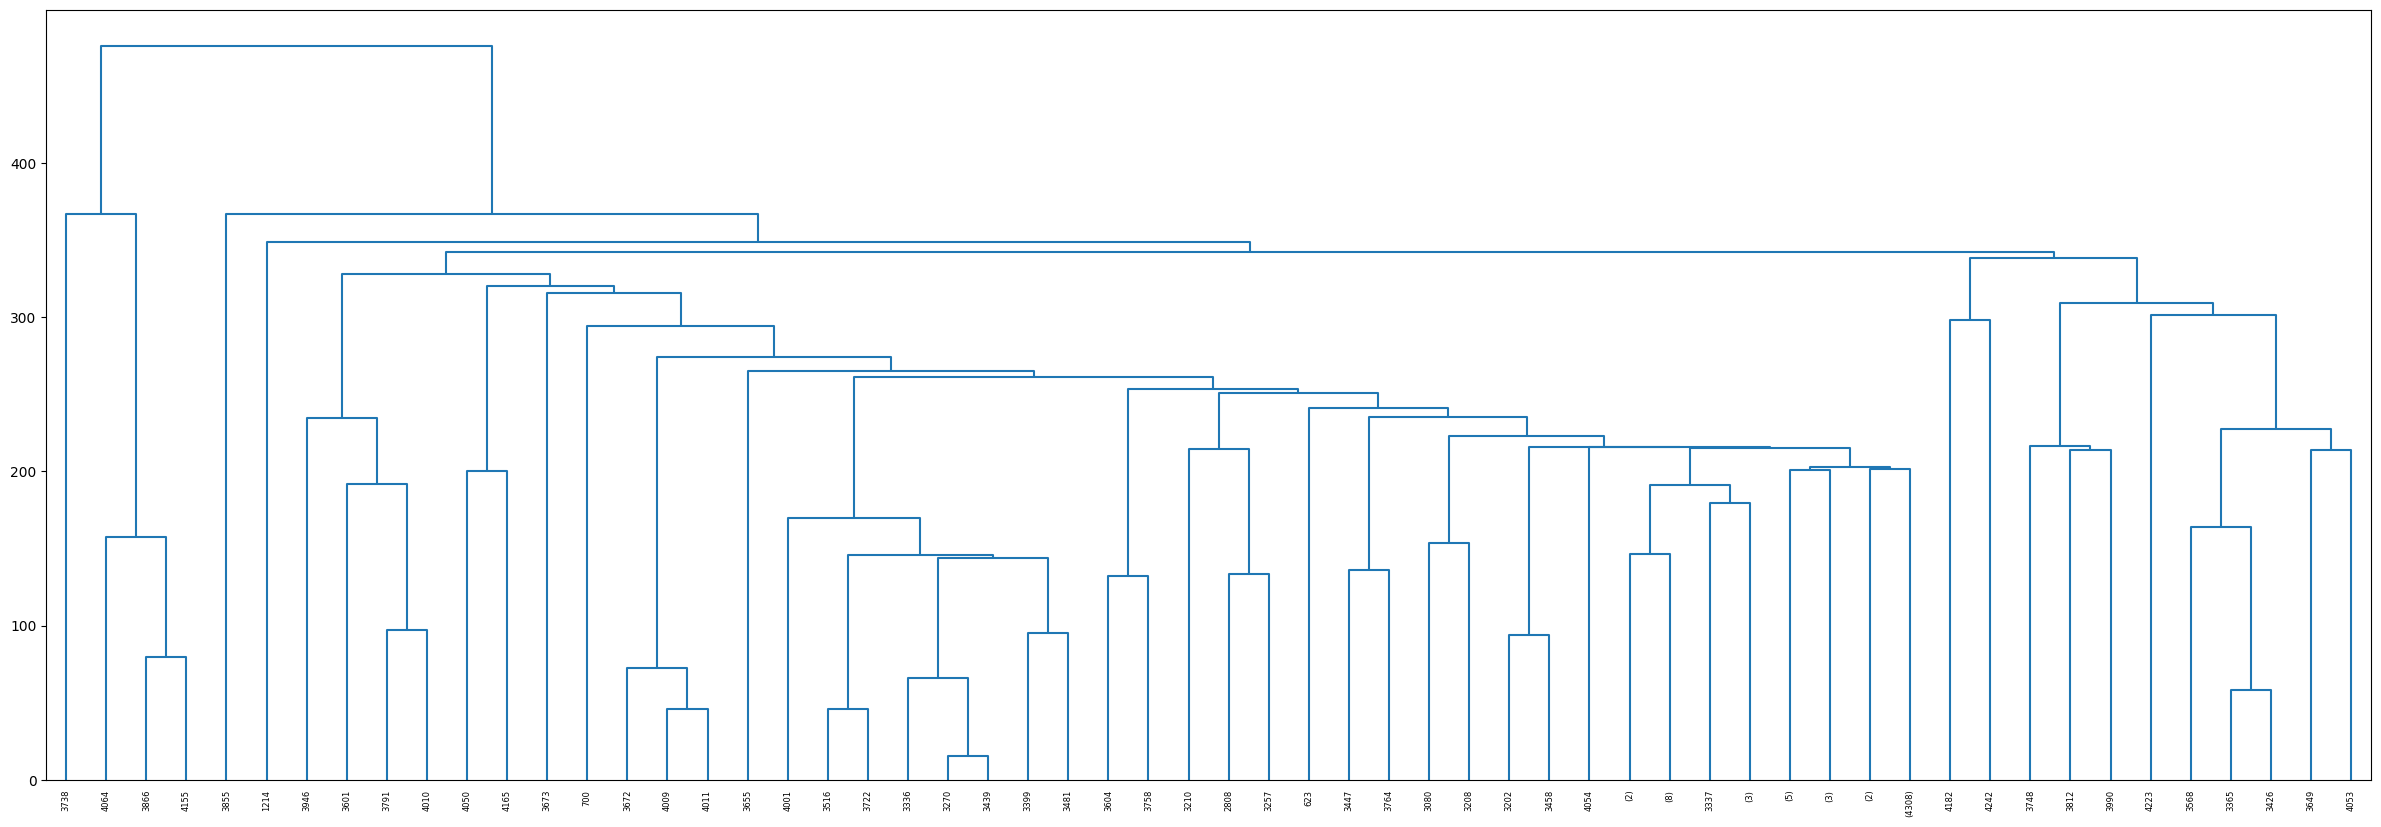

In [33]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','g','b']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=20, color_threshold=10) # color_threshold=10 sets clusters below y-axis value of 10 to be of the same color

In [34]:
model1 = AgglomerativeClustering(n_clusters=4)

In [35]:
cluster_aglo = model1.fit_predict(df_cluster) # predict the categories for each point.
cluster_aglo

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
df['cluster Agglo'] = cluster_aglo
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,cluster KMeans,cluster Agglo
0,2010-01-01,60,4,73,27,14,73,CO,2,DKI1,0,0
1,2010-01-02,32,2,16,33,9,33,O3,1,DKI1,0,0
2,2010-01-03,27,2,19,20,9,27,PM10,1,DKI1,0,0
3,2010-01-04,22,2,16,15,6,22,PM10,1,DKI1,0,0
4,2010-01-05,25,2,17,15,8,25,PM10,1,DKI1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,59,53,16,34,33,89,PM25,2,DKI4,0,0
4379,2021-12-28,61,54,15,37,29,98,PM25,2,DKI4,0,0
4380,2021-12-29,60,53,17,38,44,102,PM25,3,DKI4,0,0
4381,2021-12-30,61,54,15,37,29,98,PM25,2,DKI4,0,0


# Hitungan penentuan cluster

In [37]:
#Hitung centroid K-Means
centroid_kmeans = df.groupby('cluster KMeans', as_index=False)['pm10','so2','co','o3','no2'].mean()
centroid_kmeans

C:\Users\bayuk\AppData\Local\Temp\ipykernel_9504\2840522178.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroid_kmeans = df.groupby('cluster KMeans', as_index=False)['pm10','so2','co','o3','no2'].mean()


,cluster KMeans,pm10,so2,co,o3,no2
0,0,51.943228,28.920657,27.335841,48.523940,18.590971
1,1,73.323810,24.025397,35.819048,212.269841,18.911111
2,2,72.101482,26.527936,32.993729,85.596921,17.277651
3,3,71.434272,26.971831,32.041080,136.287559,18.366197


In [38]:
#Hitung centroid Hierarchical (Agglo)
centroid_kmeans = df.groupby('cluster Agglo', as_index=False)['pm10','so2','co','o3','no2'].mean()
centroid_kmeans

C:\Users\bayuk\AppData\Local\Temp\ipykernel_9504\2891351477.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroid_kmeans = df.groupby('cluster Agglo', as_index=False)['pm10','so2','co','o3','no2'].mean()


,cluster Agglo,pm10,so2,co,o3,no2
0,0,53.703830,29.157319,27.562244,48.599179,19.165527
1,1,71.571346,26.038863,33.446056,86.107889,16.937935
2,2,71.895105,23.874126,36.461538,215.419580,18.814685
3,3,70.142700,27.456641,30.771679,134.960483,18.098793


In [39]:
def f1(row):
    if row['cluster KMeans'] == 0:
        val = 1
    elif row['cluster KMeans'] == 2:
        val = 2
    elif row['cluster KMeans'] == 3:
        val = 3
    else:
        val = 4
    return val

In [40]:
df['klas_KMeans'] = df.apply(f1, axis=1)
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,cluster KMeans,cluster Agglo,klas_KMeans
0,2010-01-01,60,4,73,27,14,73,CO,2,DKI1,0,0,1
1,2010-01-02,32,2,16,33,9,33,O3,1,DKI1,0,0,1
2,2010-01-03,27,2,19,20,9,27,PM10,1,DKI1,0,0,1
3,2010-01-04,22,2,16,15,6,22,PM10,1,DKI1,0,0,1
4,2010-01-05,25,2,17,15,8,25,PM10,1,DKI1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,59,53,16,34,33,89,PM25,2,DKI4,0,0,1
4379,2021-12-28,61,54,15,37,29,98,PM25,2,DKI4,0,0,1
4380,2021-12-29,60,53,17,38,44,102,PM25,3,DKI4,0,0,1
4381,2021-12-30,61,54,15,37,29,98,PM25,2,DKI4,0,0,1


In [41]:
def f1(row):
    if row['cluster Agglo'] == 0:
        val = 1
    elif row['cluster Agglo'] == 1:
        val = 2
    elif row['cluster Agglo'] == 3:
        val = 3
    else:
        val = 4
    return val

In [42]:
df['klas_Agglo'] = df.apply(f1, axis=1)
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku,cluster KMeans,cluster Agglo,klas_KMeans,klas_Agglo
0,2010-01-01,60,4,73,27,14,73,CO,2,DKI1,0,0,1,1
1,2010-01-02,32,2,16,33,9,33,O3,1,DKI1,0,0,1,1
2,2010-01-03,27,2,19,20,9,27,PM10,1,DKI1,0,0,1,1
3,2010-01-04,22,2,16,15,6,22,PM10,1,DKI1,0,0,1,1
4,2010-01-05,25,2,17,15,8,25,PM10,1,DKI1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,59,53,16,34,33,89,PM25,2,DKI4,0,0,1,1
4379,2021-12-28,61,54,15,37,29,98,PM25,2,DKI4,0,0,1,1
4380,2021-12-29,60,53,17,38,44,102,PM25,3,DKI4,0,0,1,1
4381,2021-12-30,61,54,15,37,29,98,PM25,2,DKI4,0,0,1,1


C:\Users\bayuk\AppData\Local\Temp\ipykernel_9504\1027301763.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bulanan = df.set_index('tanggal').resample('M').mean()


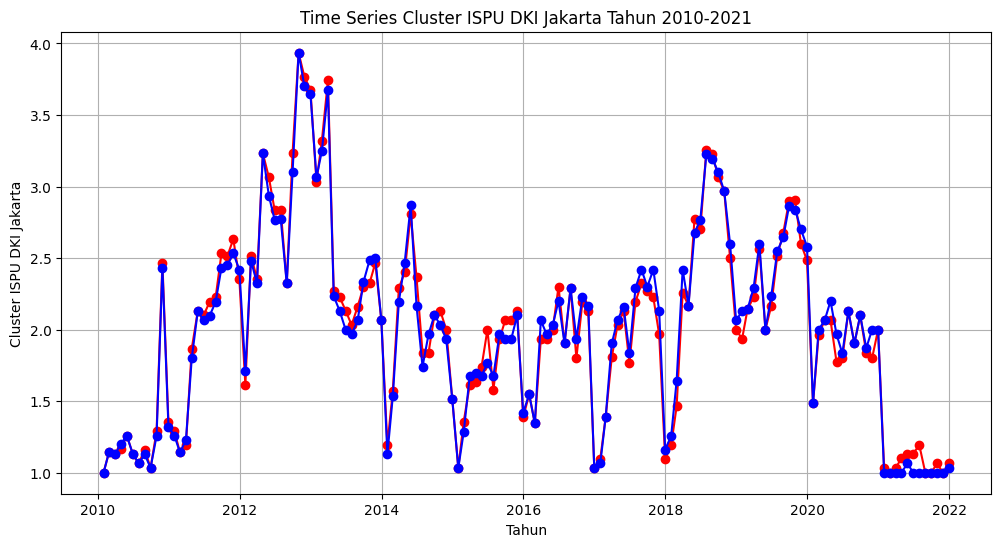

In [43]:
# Meresample data harian menjadi data bulanan
df_bulanan = df.set_index('tanggal').resample('M').mean()

# Menggambar time series plot data bulanan
plt.figure(figsize=(12, 6))
plt.plot(df_bulanan.index, df_bulanan['klas_KMeans'], marker='o', linestyle='-', color='r')
plt.plot(df_bulanan.index, df_bulanan['klas_Agglo'], marker='o', linestyle='-', color='b')
plt.title('Time Series Cluster ISPU DKI Jakarta Tahun 2010-2021')
plt.xlabel('Tahun')
plt.ylabel('Cluster ISPU DKI Jakarta')
plt.grid(True)
plt.show()

In [44]:
from sklearn.metrics import accuracy_score

# Iterasi melalui kolom 'categori' dan gantikan nilai yang tidak valid dengan nilai sebelumnya
for index, row in df.iterrows():
    if not str(row['categori']).isdigit():
        df.at[index, 'categori'] = previous_value
    else:
        previous_value = row['categori']

df['categori'] = df['categori'].astype(int)
cek_acc = accuracy_score(df['categori'], df['klas_KMeans'])
cek_err = 1 - accuracy_score(df['categori'], df['klas_KMeans'])
print("K-MEANS Clustering Akurasi Rate :", cek_acc)
print("K-MEANS Clustering Error Rate :", cek_err)

cek_acc = accuracy_score(df['categori'], df['klas_Agglo'])
cek_err = 1 - accuracy_score(df['categori'], df['klas_Agglo'])
print("Hierarchical Clustering Akurasi Rate :", cek_acc)
print("Hierarchical Clustering Error Rate :", cek_err)

K-MEANS Clustering Akurasi Rate : 0.622632899840292
K-MEANS Clustering Error Rate : 0.377367100159708
Hierarchical Clustering Akurasi Rate : 0.6297056810403833
Hierarchical Clustering Error Rate : 0.37029431895961673


In [46]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from tabulate import tabulate

# Hitung Silhouette Score
silhouette_kmeans = silhouette_score(df_cluster, k_means_labels)
silhouette_agglo = silhouette_score(df_cluster, cluster_aglo)

# Menghitung metrik Calinski-Harabasz Index
calinski_kmeans = calinski_harabasz_score(df_cluster, k_means_labels)
calinski_agglo = calinski_harabasz_score(df_cluster, cluster_aglo)

# Menyusun data dalam bentuk tabel
results = {
    "Clustering Algorithm": ["K-Means", "Agglomerative"],
    "Silhouette Score": [silhouette_kmeans, silhouette_agglo],
    "Calinski-Harabasz Index": [calinski_kmeans, calinski_agglo]
}

df_results = pd.DataFrame(results)

# Cetak tabel dengan garis
print("Evaluasi Clustering")
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))

Evaluasi Clustering
╒════╤════════════════════════╤════════════════════╤═══════════════════════════╕
│    │ Clustering Algorithm   │   Silhouette Score │   Calinski-Harabasz Index │
╞════╪════════════════════════╪════════════════════╪═══════════════════════════╡
│  0 │ K-Means                │           0.287302 │                   3388.07 │
├────┼────────────────────────┼────────────────────┼───────────────────────────┤
│  1 │ Agglomerative          │           0.253581 │                   3056.07 │
╘════╧════════════════════════╧════════════════════╧═══════════════════════════╛


In [ ]:
df.to_csv('Hasil Cluster ISPU DKI Jakarta 2010-2021-time series.csv',index=False)